In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import re
import datetime
import pylab as pl
pl.style.use('fivethirtyeight')
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import statsmodels.api as sma
import numpy as np
import scipy
import statsmodels

In [3]:
def convertDate(d):
    #dt = datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S')
    #dt = dt.replace(minute=(dt.minute / 20) * 10, second=0, microsecond=0)
    dt = datetime.datetime.strptime(d, '%m/%d/%Y')
    dt = dt.replace(day=1)
    #dt = dt - datetime.timedelta(hours=5)
    return dt

crashes = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', converters={'DATE': convertDate})#, parse_dates=[1])

In [4]:
crashes['PERCENT OF PERSONS KILLED'] = crashes['NUMBER OF PERSONS KILLED']/(crashes['NUMBER OF PERSONS KILLED'] + crashes['NUMBER OF PERSONS INJURED'])
crashes['PERCENT OF PEDESTRIANS KILLED'] = crashes['NUMBER OF PEDESTRIANS KILLED']/(crashes['NUMBER OF PEDESTRIANS KILLED'] + crashes['NUMBER OF PEDESTRIANS INJURED'])
crashes['PERCENT OF CYCLIST KILLED'] = crashes['NUMBER OF CYCLIST KILLED']/(crashes['NUMBER OF CYCLIST KILLED'] + crashes['NUMBER OF CYCLIST INJURED'])
crashes['PERCENT OF MOTORIST KILLED'] = crashes['NUMBER OF MOTORIST KILLED']/(crashes['NUMBER OF MOTORIST KILLED'] + crashes['NUMBER OF MOTORIST INJURED'])

In [29]:
crashes['month'] = crashes.apply(lambda x: x['DATE'].month, axis=1)
#crashes.iloc[0].DATE.month

In [5]:
crashes.columns

Index([u'DATE', u'TIME', u'BOROUGH', u'ZIP CODE', u'LATITUDE', u'LONGITUDE',
       u'LOCATION', u'ON STREET NAME', u'CROSS STREET NAME',
       u'OFF STREET NAME', u'NUMBER OF PERSONS INJURED',
       u'NUMBER OF PERSONS KILLED', u'NUMBER OF PEDESTRIANS INJURED',
       u'NUMBER OF PEDESTRIANS KILLED', u'NUMBER OF CYCLIST INJURED',
       u'NUMBER OF CYCLIST KILLED', u'NUMBER OF MOTORIST INJURED',
       u'NUMBER OF MOTORIST KILLED', u'CONTRIBUTING FACTOR VEHICLE 1',
       u'CONTRIBUTING FACTOR VEHICLE 2', u'CONTRIBUTING FACTOR VEHICLE 3',
       u'CONTRIBUTING FACTOR VEHICLE 4', u'CONTRIBUTING FACTOR VEHICLE 5',
       u'UNIQUE KEY', u'VEHICLE TYPE CODE 1', u'VEHICLE TYPE CODE 2',
       u'VEHICLE TYPE CODE 3', u'VEHICLE TYPE CODE 4', u'VEHICLE TYPE CODE 5',
       u'PERCENT OF PERSONS KILLED', u'PERCENT OF PEDESTRIANS KILLED',
       u'PERCENT OF CYCLIST KILLED', u'PERCENT OF MOTORIST KILLED'],
      dtype='object')

In [133]:
sum_categories = [
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF MOTORIST KILLED',
    'NUMBER OF MOTORIST INJURED'
]

injured_categories = [
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF MOTORIST INJURED'
]

injured_categories_2 = [
    ('NUMBER OF PERSONS INJURED', 'Person', 'blue'),
    ('NUMBER OF PEDESTRIANS INJURED', 'Pedestrian', 'green'),
    ('NUMBER OF CYCLIST INJURED', 'Cyclist', 'red'),
    ('NUMBER OF MOTORIST INJURED', 'Motorist', 'orange')
]
        
percent_categories = [
    'PERCENT OF PERSONS KILLED',
    'PERCENT OF PEDESTRIANS KILLED',
    'PERCENT OF CYCLIST KILLED',
    'PERCENT OF MOTORIST KILLED',
]

In [46]:
help(smf.ols)

Help on method from_formula in module statsmodels.base.model:

from_formula(cls, formula, data, subset=None, *args, **kwargs) method of __builtin__.type instance
    Create a Model from a formula and dataframe.
    
    Parameters
    ----------
    formula : str or generic Formula object
        The formula specifying the model
    data : array-like
        The data for the model. See Notes.
    subset : array-like
        An array-like object of booleans, integers, or index values that
        indicate the subset of df to use in the model. Assumes df is a
        `pandas.DataFrame`
    args : extra arguments
        These are passed to the model
    kwargs : extra keyword arguments
        These are passed to the model with one exception. The
        ``eval_env`` keyword is passed to patsy. It can be either a
        :class:`patsy:patsy.EvalEnvironment` object or an integer
        indicating the depth of the namespace to use. For example, the
        default ``eval_env=0`` uses the 

In [138]:
def doStuff02(col,label,ax,color):
    print
    print col
    
    agg = crashes.groupby('DATE').sum()[col]
    months = crashes.groupby('DATE').mean()['month']
    
    x = np.unique(crashes['DATE'])
    
    #figure, ax = pl.subplots(figsize=(16,6))
    ax.plot_date(x, agg, '-',color=color, alpha=.5, label='Actual %s Injuries' % label)
    
    df = {'d': range(len(agg)), 'c': agg, 'm': months}
    mod = smf.ols(formula='c ~ d + C(m)', data = df).fit()
    print mod.summary()
    y = mod.predict(df)
    ax.plot_date(x, y, '--',color=color, label='%s Model' % label)
    



NUMBER OF PERSONS INJURED
                            OLS Regression Results                            
Dep. Variable:                      c   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     18.91
Date:                Sat, 05 Dec 2015   Prob (F-statistic):           2.52e-10
Time:                        22:11:58   Log-Likelihood:                -269.18
No. Observations:                  41   AIC:                             564.4
Df Residuals:                      28   BIC:                             586.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     3964.67

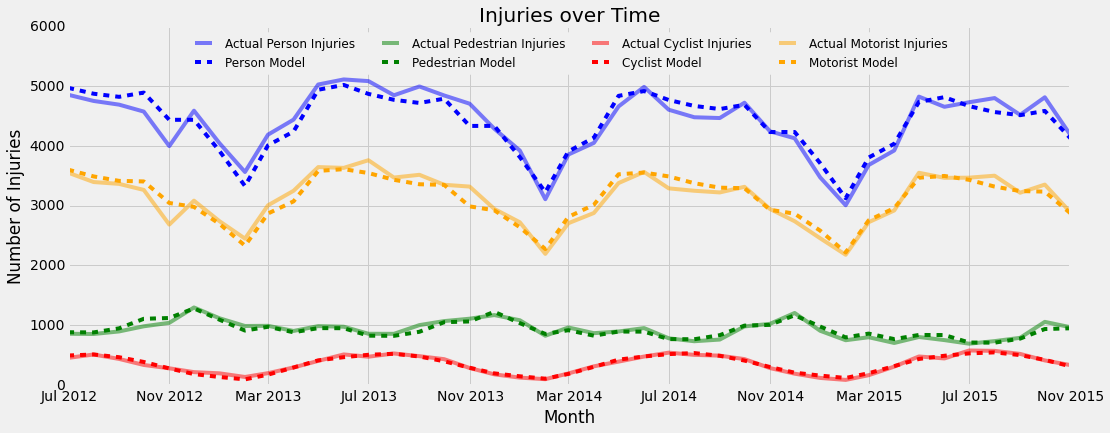

In [139]:
figure, ax = pl.subplots(figsize=(16,6))
for col,label,color in injured_categories_2:
    doStuff02(col,label,ax,color)
    
ax.set_title('Injuries over Time')
ax.set_ylabel('Number of Injuries')
ax.set_xlabel('Month')
ax.legend(fontsize=12,ncol=4,loc=9)
#ax.set_ylim([0,8000])

In [119]:
def doStuff0(col):
    print
    print col
    
    agg = crashes.groupby('DATE').sum()[col]
    months = crashes.groupby('DATE').mean()['month']
    
    x = np.unique(crashes['DATE'])
    
    figure, ax = pl.subplots(figsize=(16,6))
    ax.plot_date(x, agg, '-',label='Actual Injuries')
    
    df = {'d': range(len(agg)), 'c': agg, 'm': months}
    mod = smf.ols(formula='c ~ d + C(m)', data = df).fit()
    print mod.summary()
    y = mod.predict(df)
    ax.plot_date(x, y, 'r--',label='Model')
    
    ax.set_title(col)
    ax.set_ylabel('Number of Injuries')
    ax.set_xlabel('Month')
    ax.legend()


NUMBER OF PERSONS INJURED
                            OLS Regression Results                            
Dep. Variable:                      c   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     18.91
Date:                Sat, 05 Dec 2015   Prob (F-statistic):           2.52e-10
Time:                        21:59:16   Log-Likelihood:                -269.18
No. Observations:                  41   AIC:                             564.4
Df Residuals:                      28   BIC:                             586.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     3964.67

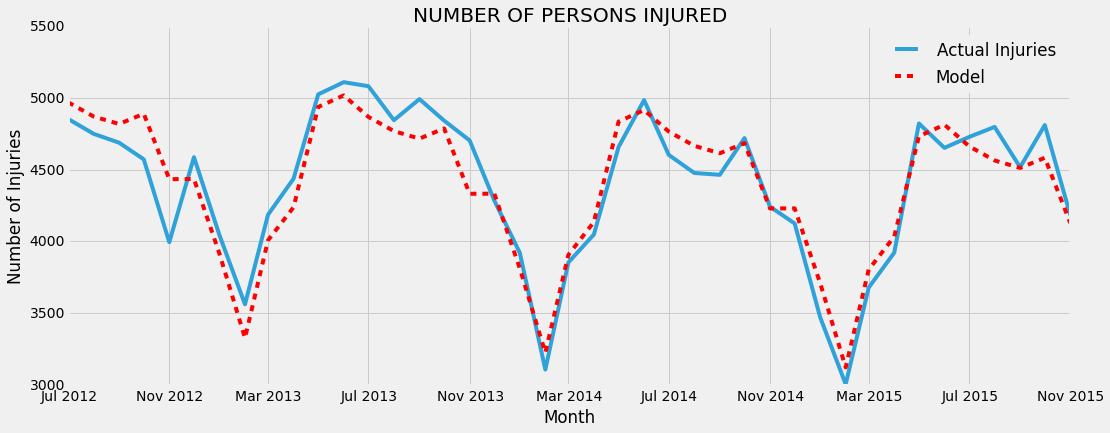

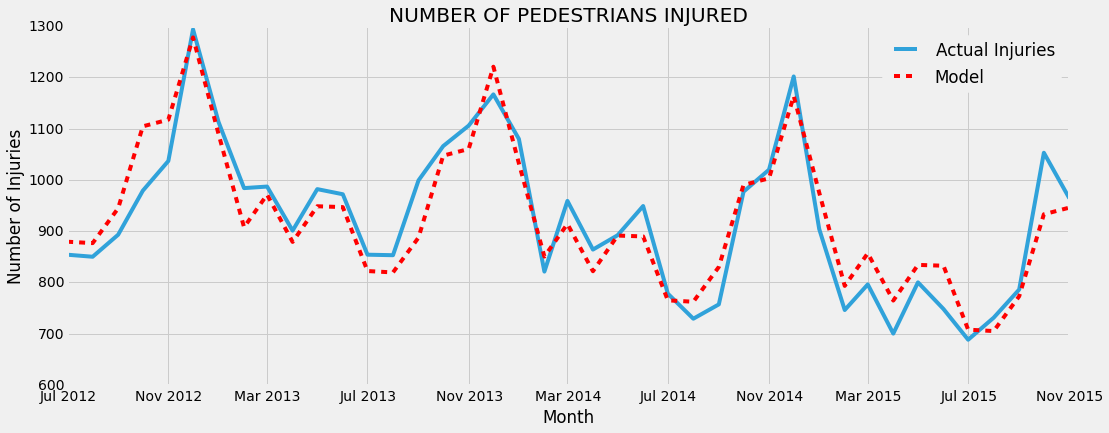

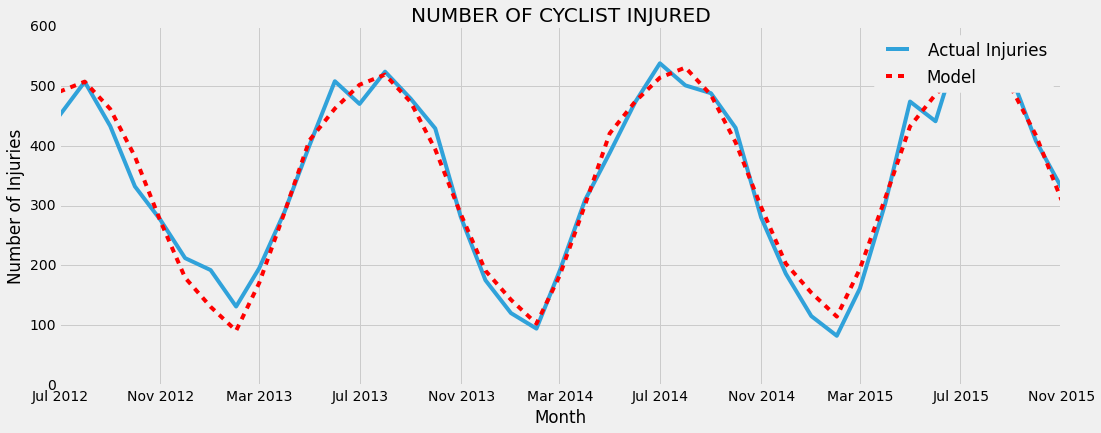

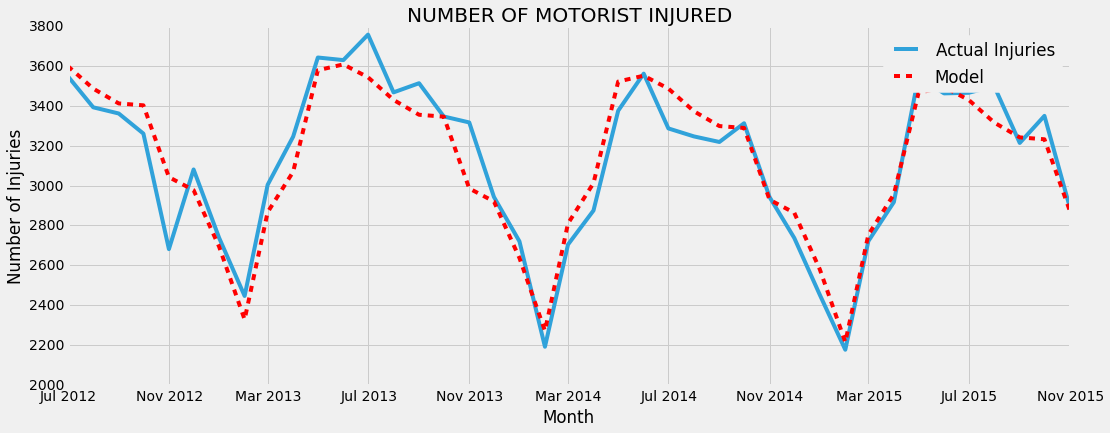

In [120]:
for col in injured_categories:
    doStuff0(col)

In [80]:
agg = crashes.groupby('DATE').sum()['NUMBER OF PEDESTRIANS INJURED']

In [79]:
months = crashes.groupby('DATE').mean()['month']

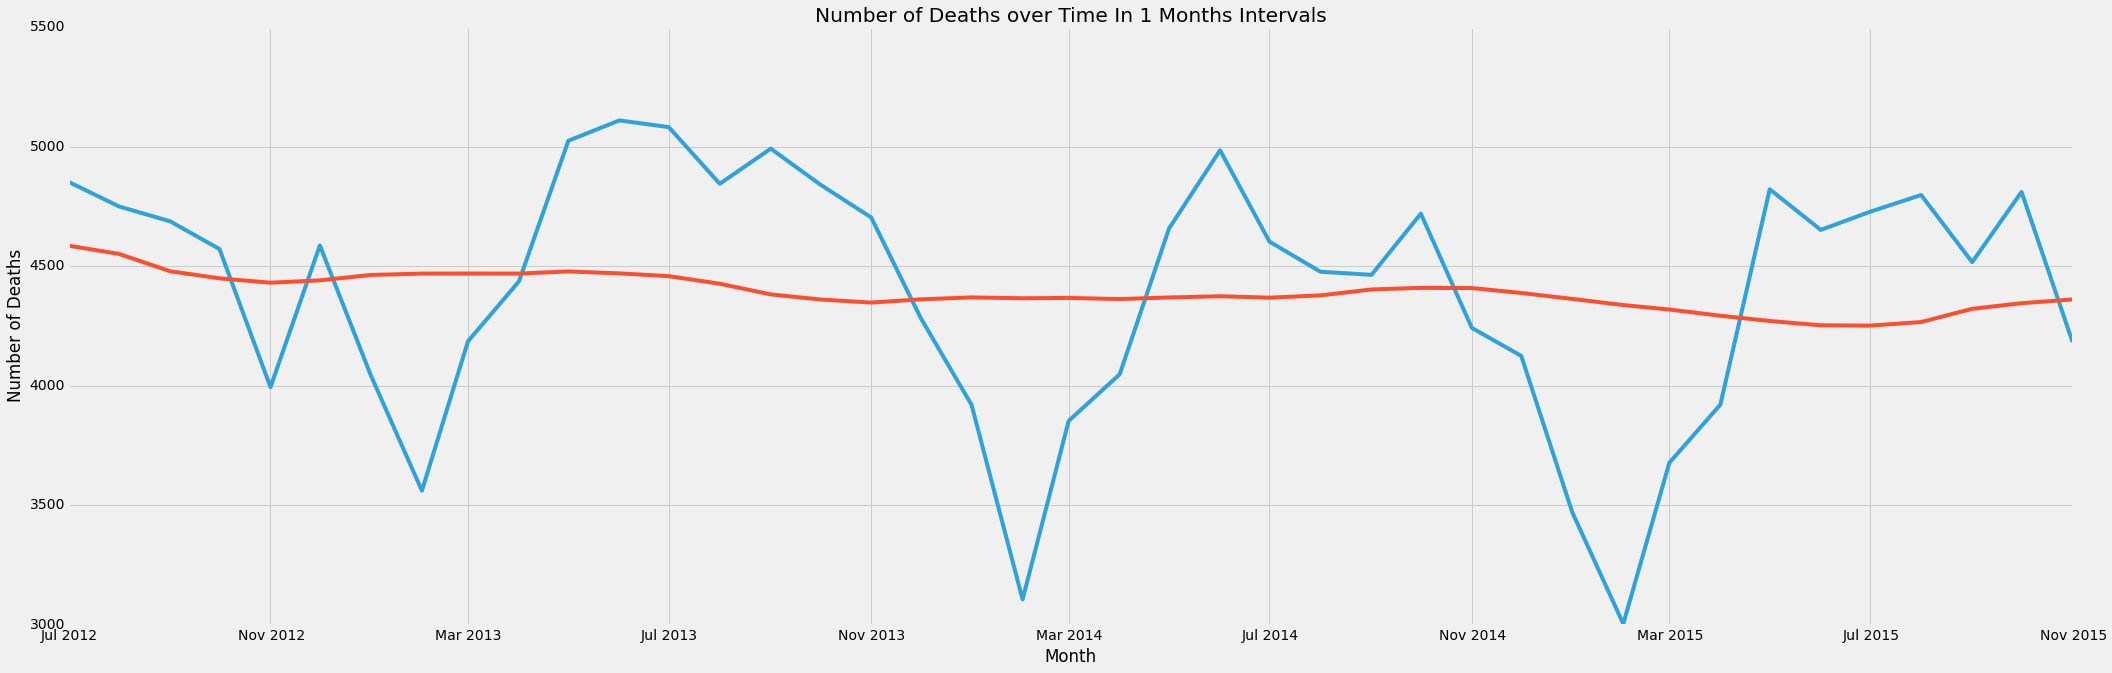

In [36]:
x = np.unique(crashes['DATE'])

figure, ax = pl.subplots(figsize=(32,10))
ax.plot_date(x, agg, '-')
ax.set_title('Number of Deaths over Time In 1 Months Intervals')
ax.set_ylabel('Number of Deaths')
ax.set_xlabel('Month')

#pd.ewma(agg,.5)
smoothed = pd.rolling_mean(agg,12,3,center=True)
ax.plot(x,smoothed)

                            OLS Regression Results                            
Dep. Variable:                      c   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     6.474
Date:                Sat, 05 Dec 2015   Prob (F-statistic):           2.62e-05
Time:                        21:31:06   Log-Likelihood:                -236.14
No. Observations:                  41   AIC:                             496.3
Df Residuals:                      29   BIC:                             516.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     1032.3333     52.688     19.593   

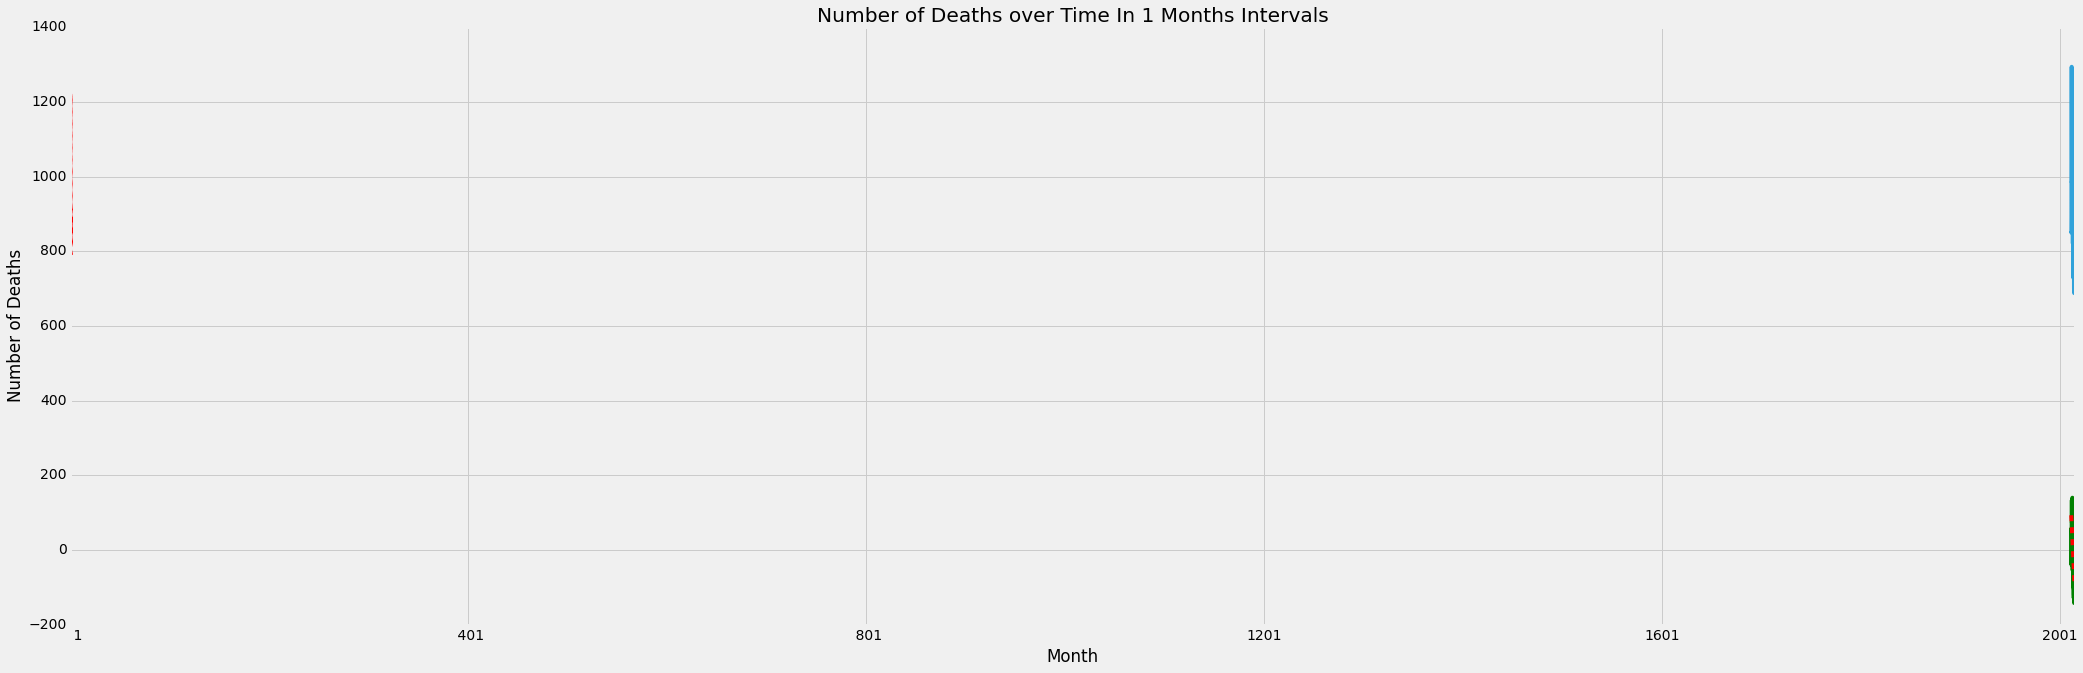

In [81]:
figure, ax = pl.subplots(figsize=(32,10))
ax.plot_date(np.unique(crashes['DATE']), agg, '-')
ax.set_title('Number of Deaths over Time In 1 Months Intervals')
ax.set_ylabel('Number of Deaths')
ax.set_xlabel('Month')
df = {'d': range(len(agg)), 'c': agg, 'm': months}
mod = smf.ols(formula='c ~ C(m)', data = df).fit()
print mod.summary()
#abline_plot(model_results=mod, ax=ax, color='red')
#y = mod.params[0] + mod.params[1]*np.arange(len(agg))
y = mod.predict(df)
ax.plot_date(np.unique(crashes['DATE']), y, 'r--')

ax.plot_date(np.unique(crashes['DATE']), agg-y, 'g-')

df = {'d': range(len(agg)), 'c': agg-y, 'm': months}
mod = smf.ols(formula='c ~ d', data = df).fit()
print mod.summary()
#abline_plot(model_results=mod, ax=ax, color='red')
#y = mod.params[0] + mod.params[1]*np.arange(len(agg))
y = mod.predict(df)
ax.plot_date(np.unique(crashes['DATE']), y, 'r--')

#ticks = np.repeat(datetime.datetime(year=2012, month=7, day=1), 42) + datetime.timedelta(months=1)*np.arange(42)
#ax.set_xticks(ticks)
#ax.set_xticklabels([d.strftime('%Y') if d.month == 1 else d.strftime('%b') for d in ticks])

In [54]:
df = {'d': range(len(agg)), 'c': agg - y}
mod = smf.ols(formula='c ~ d', data = df).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                      c   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     41.83
Date:                Sat, 05 Dec 2015   Prob (F-statistic):           1.16e-07
Time:                        20:49:03   Log-Likelihood:                -221.20
No. Observations:                  41   AIC:                             446.4
Df Residuals:                      39   BIC:                             449.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     93.3240     16.766      5.566      0.0

In [61]:
agg[28:]

DATE
2014-11-01    1020
2014-12-01    1202
2015-01-01     904
2015-02-01     746
2015-03-01     796
2015-04-01     700
2015-05-01     800
2015-06-01     748
2015-07-01     688
2015-08-01     731
2015-09-01     786
2015-10-01    1053
2015-11-01     964
Name: NUMBER OF PEDESTRIANS INJURED, dtype: int64

In [109]:
def doStuff1(col):    
    # Where Vision Zero Started and Where Speed limit went city wide
    jan_index = 18
    nov_index = 28
    
    # Aggregate
    agg = crashes.groupby('DATE').sum()[col]
    months = crashes.groupby('DATE').mean()['month']
    dates = np.unique(crashes['DATE'])
    
    # Control for months
    df = {'c': agg, 'm': months}
    mod = smf.ols(formula='c ~ C(m)', data = df).fit()
    y = mod.predict(df)
    
    # Unaccounted for injuries after running model with months
    diff = agg - y
    
    # Create Fig
    figure, ax = pl.subplots(figsize=(16,6))
    ax.set_title(col)
    #ax.plot_date(dates,agg,'-',label='Monthly Totals')
    #ax.plot_date(dates,y,'--',color='orange',label='Model with Months')
    ax.plot_date(dates,diff,'-',label='Actual - Model')
    
    
    #Before
    y = diff[:jan_index]#/diff[0]#/np.max(trend[:jan_index+1])
    x = np.arange(len(y))
    df = {'y': y, 'x': x}
    mod = smf.ols(formula='y ~ x', data = df).fit()
    print col, 'BEFORE'
    print mod.summary()
    y = mod.predict(df)
    ax.plot_date(dates[:jan_index],y,'--',color='red',label='Regression Before Vision Zero')
    
    #JAN
    y = diff[jan_index:]#/diff[0]#/np.max(trend[:jan_index+1])
    x = np.arange(len(y))
    df = {'y': y, 'x': x}
    mod = smf.ols(formula='y ~ x', data = df).fit()
    print col, 'JAN'
    print mod.summary()
    y = mod.predict(df)
    ax.plot_date(dates[jan_index:],y,'--',color='orange',label='Regression After Vision Zero')
    
    #NOV
    y = diff[nov_index:]#/diff[0]#/np.max(trend[:jan_index+1])
    x = np.arange(len(y))
    df = {'y': y, 'x': x}
    mod = smf.ols(formula='y ~ x', data = df).fit()
    print col, 'NOV'
    print mod.summary()
    y = mod.predict(df)
    ax.plot_date(dates[nov_index:],y,'--',color='green',label='Regression After 25MPH')
    
    ax.set_xlabel('Month')
    ax.set_ylabel('Injuries')
    ax.legend()

NUMBER OF PERSONS INJURED BEFORE
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     3.375
Date:                Sat, 05 Dec 2015   Prob (F-statistic):             0.0849
Time:                        21:55:10   Log-Likelihood:                -117.38
No. Observations:                  18   AIC:                             238.8
Df Residuals:                      16   BIC:                             240.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     22.58

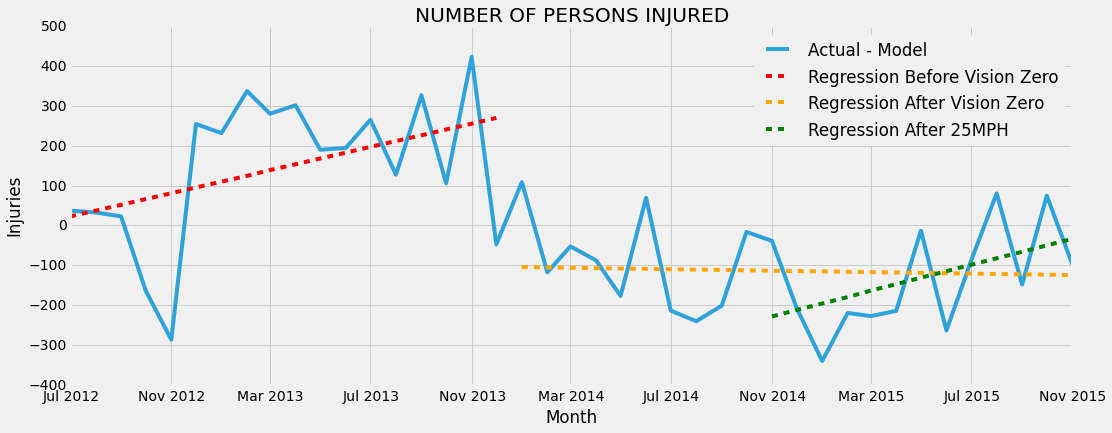

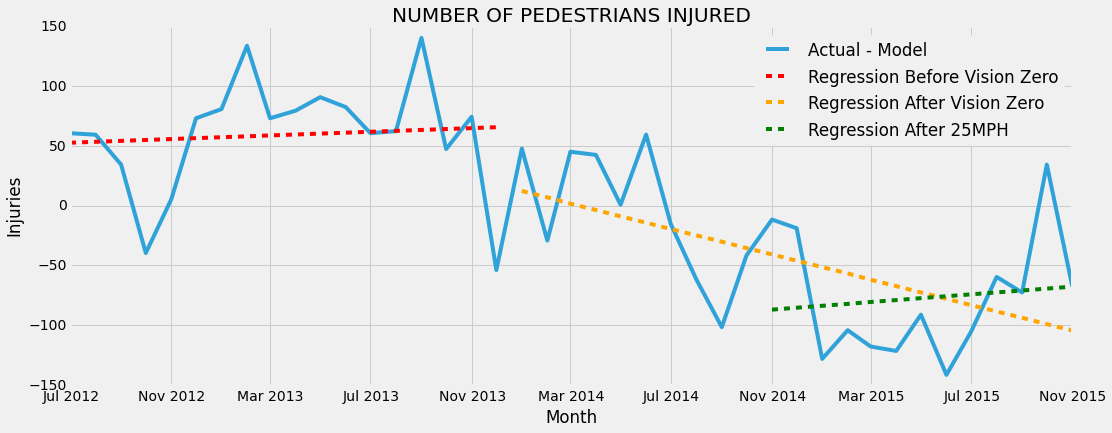

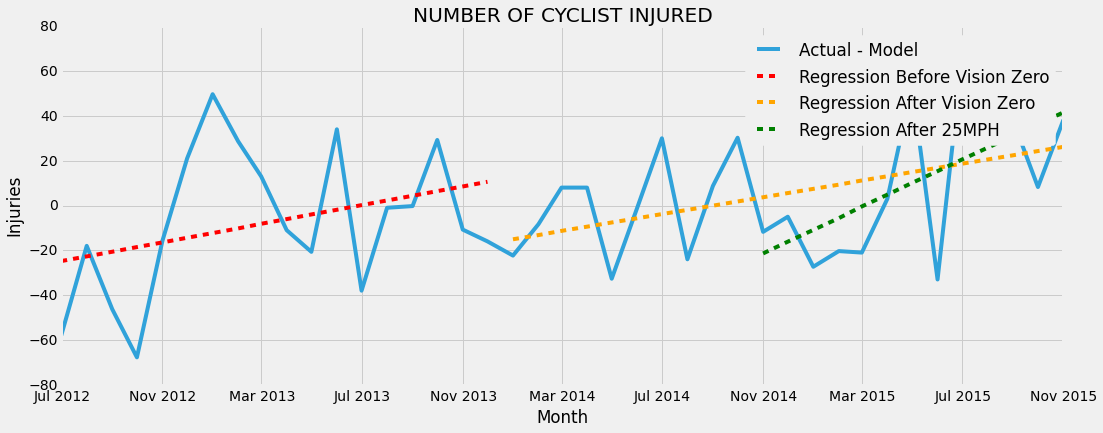

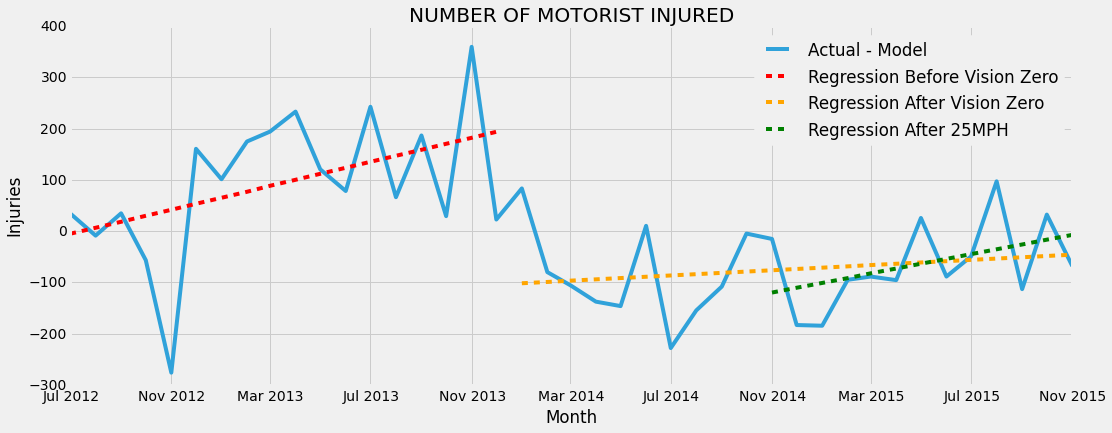

In [110]:
for col in injured_categories:
    doStuff1(col)

In [174]:
grouped = crashes.groupby('DATE')
        


# Get numbers for each date
sums = dict([(i,[]) for i in sum_categories])
percents = dict([(i,[]) for i in percent_categories])

date = []
count = []
for d in sorted(grouped.groups.keys())[:-1]:
    print d
    group = grouped.get_group(d)
    
    date.append(group.iloc[0]['DATE'])
    
    
    count.append(group.count()['NUMBER OF PERSONS KILLED'])
    
    group_sum = group.sum()
    for i in sum_categories:
        sums[i].append(group_sum[i])
        
    group_mean = group.mean()
    for i in percent_categories:
        percents[i].append(group_mean[i])

2012-06-30T20:00:00.000000000-0400
2012-07-31T20:00:00.000000000-0400
2012-08-31T20:00:00.000000000-0400
2012-09-30T20:00:00.000000000-0400
2012-10-31T20:00:00.000000000-0400
2012-11-30T19:00:00.000000000-0500
2012-12-31T19:00:00.000000000-0500
2013-01-31T19:00:00.000000000-0500
2013-02-28T19:00:00.000000000-0500
2013-03-31T20:00:00.000000000-0400
2013-04-30T20:00:00.000000000-0400
2013-05-31T20:00:00.000000000-0400
2013-06-30T20:00:00.000000000-0400
2013-07-31T20:00:00.000000000-0400
2013-08-31T20:00:00.000000000-0400
2013-09-30T20:00:00.000000000-0400
2013-10-31T20:00:00.000000000-0400
2013-11-30T19:00:00.000000000-0500
2013-12-31T19:00:00.000000000-0500
2014-01-31T19:00:00.000000000-0500
2014-02-28T19:00:00.000000000-0500
2014-03-31T20:00:00.000000000-0400
2014-04-30T20:00:00.000000000-0400
2014-05-31T20:00:00.000000000-0400
2014-06-30T20:00:00.000000000-0400
2014-07-31T20:00:00.000000000-0400
2014-08-31T20:00:00.000000000-0400
2014-09-30T20:00:00.000000000-0400
2014-10-31T20:00:00.

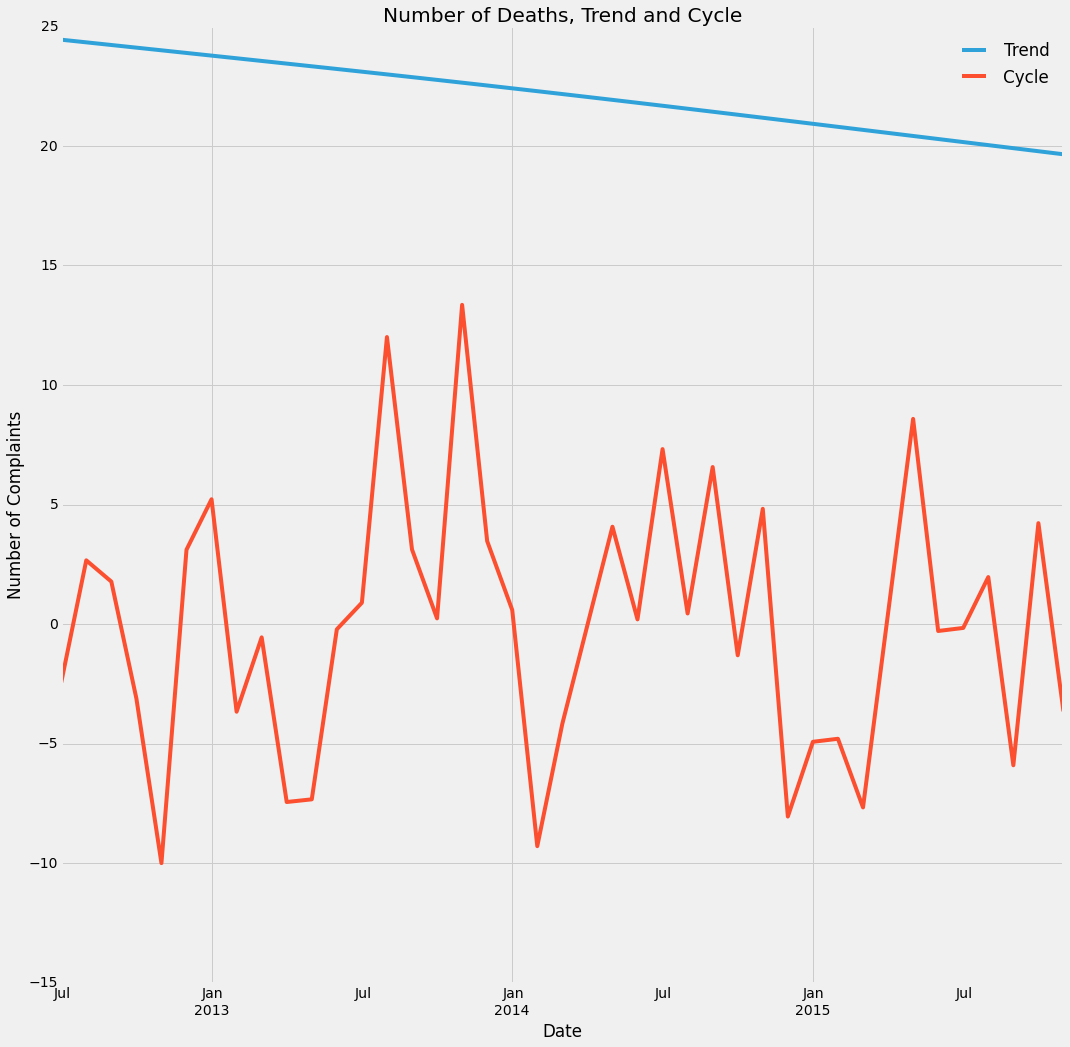

In [32]:
grouped = crashes.groupby('DATE')
cycle, trend = sma.tsa.filters.hpfilter(grouped.sum()['NUMBER OF PERSONS KILLED'], lamb = 129600)
figure, ax = pl.subplots(figsize=(16,16))
trend.plot(label='Trend')
cycle.plot(label='Cycle')
ax.set_title('Number of Deaths, Trend and Cycle')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Complaints')
ax.legend()

In [55]:
# Start of vision zero
jan_index = 17
# Speed limit decrease
nov_index = 28

#scipy.stats.chisquare(np.diff(trend)[:jan_index], np.diff(trend)[jan_index+6:])
#scipy.stats.chisquare(100*np.abs(np.diff(trend))[:jan_index], 100*np.abs(np.diff(trend))[jan_index+6:])

In [102]:
def doStuff(arr, name, lamb=129600):
    jan_index = 17
    # Speed limit decrease
    nov_index = 28
    
    cycle, trend = sma.tsa.filters.hpfilter(arr, lamb = lamb)

    figure, ax = pl.subplots(figsize=(12,8))

    #Before
    y = trend[:jan_index+1]/trend[0]#/np.max(trend[:jan_index+1])
    x = np.arange(len(y))
    ax.plot(x,y,label='Trend Before Vision Zero')

    mod = smf.ols(formula='y ~ x', data = {'x': x, 'y': y}).fit()
    print mod.conf_int()
    y = mod.params[0] + x*mod.params[1]
    ax.plot(x,y,'--', label='Regression of Trend Before Vision Zero')
    #print "Coef:", mod.params[1]

    #Jan
    y = trend[jan_index+1:]/trend[jan_index+1]#/np.max(trend[jan_index+1:])
    x = np.arange(len(y))
    ax.plot(x,y,label='Trend After Vision Zero')

    mod = smf.ols(formula='y ~ x', data = {'x': x, 'y': y}).fit()
    print mod.conf_int()
    y = mod.params[0] + x*mod.params[1]
    ax.plot(x,y,'--',label='Regression of Trend After Vision Zero')
    #print "Coef:", mod.params[1]


    y = trend[nov_index+1:]/trend[nov_index+1]#/np.max(trend[nov_index+1:])
    x = np.arange(len(y))
    ax.plot(x,y,label='Trend After Speed Limit Change')

    mod = smf.ols(formula='y ~ x', data = {'x': x, 'y': y}).fit()
    print mod.conf_int()
    y = mod.params[0] + x*mod.params[1]
    ax.plot(x,y,'--',label='Regression of Trend After Speed Limit Change')
    #print "Coef:", mod.params[1]

    ax.set_title(name)
    ax.legend()

                  0         1
Intercept  1.000035  1.000375
x         -0.004116 -0.004082
                  0         1
Intercept  1.000365  1.000744
x         -0.004931 -0.004900
                  0         1
Intercept  0.999984  0.999997
x         -0.005234 -0.005232
                  0         1
Intercept  0.999929  0.999973
x         -0.001476 -0.001471
                  0         1
Intercept  0.999170  0.999698
x         -0.001346 -0.001303
                  0         1
Intercept  0.999819  0.999968
x         -0.001266 -0.001241
                  0         1
Intercept  1.000218  1.001011
x         -0.006532 -0.006452
                  0         1
Intercept  1.000452  1.000974
x         -0.008139 -0.008096
                  0         1
Intercept  1.000000  1.000020
x         -0.008979 -0.008975
                  0         1
Intercept  1.000124  1.000531
x         -0.005083 -0.005042
                  0         1
Intercept  1.000249  1.000533
x         -0.005961 -0.005938
          

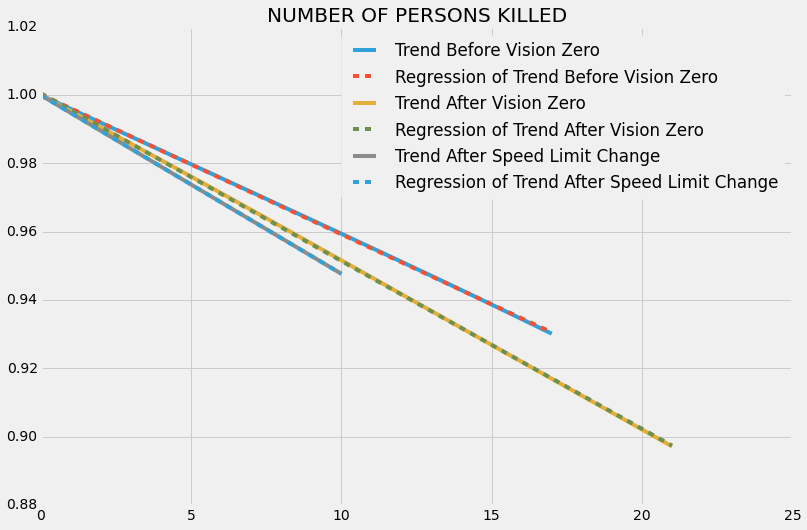

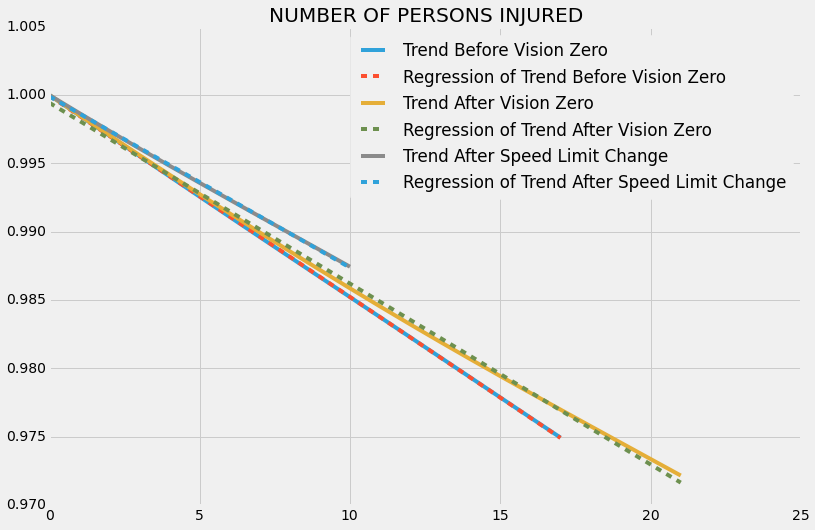

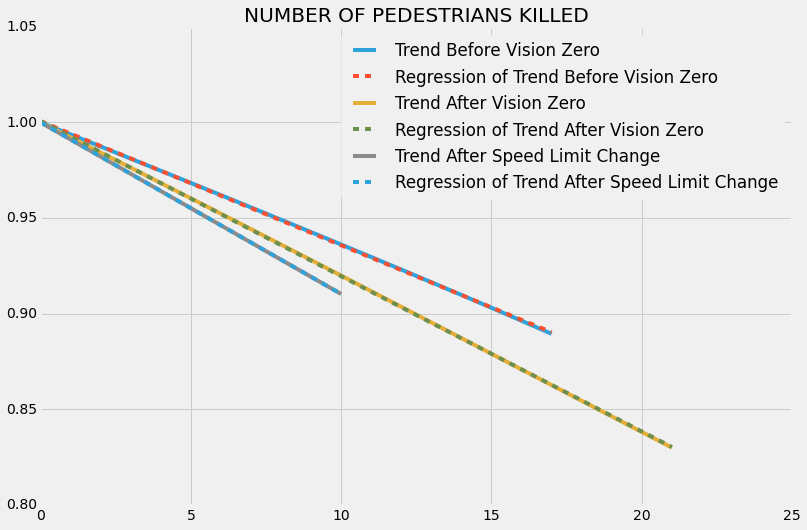

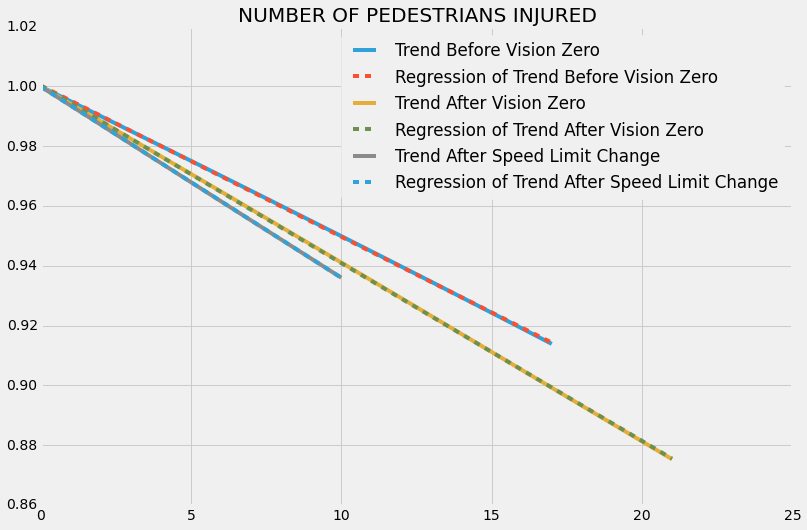

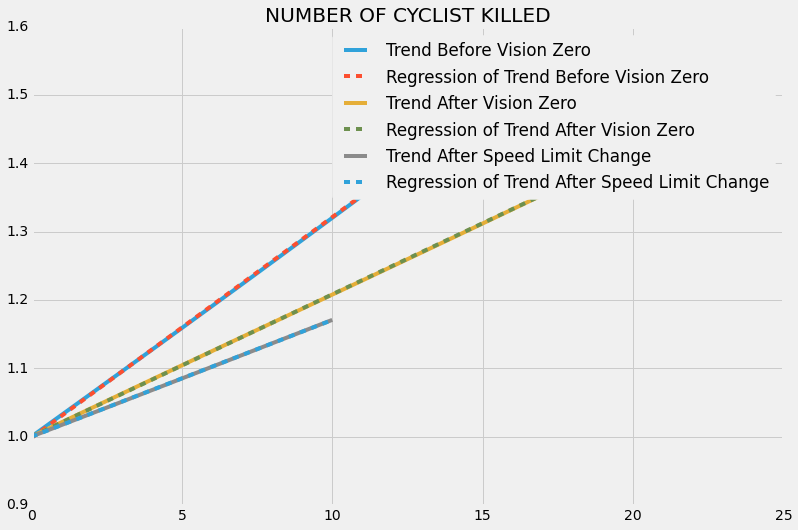

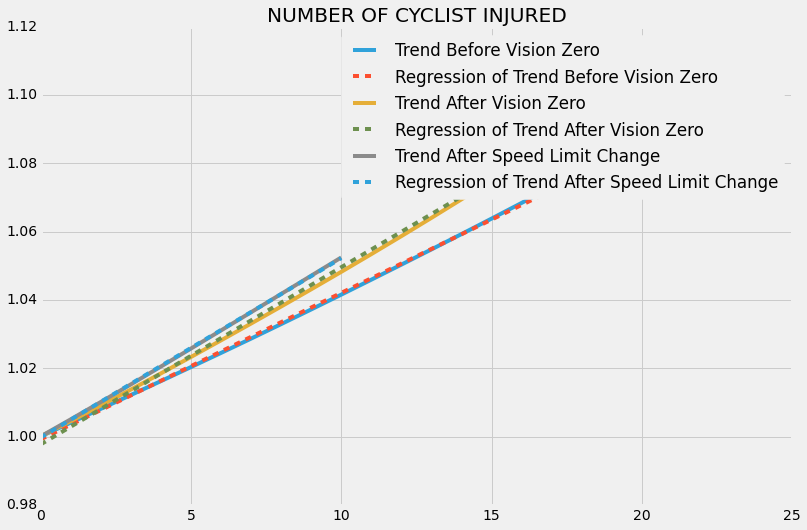

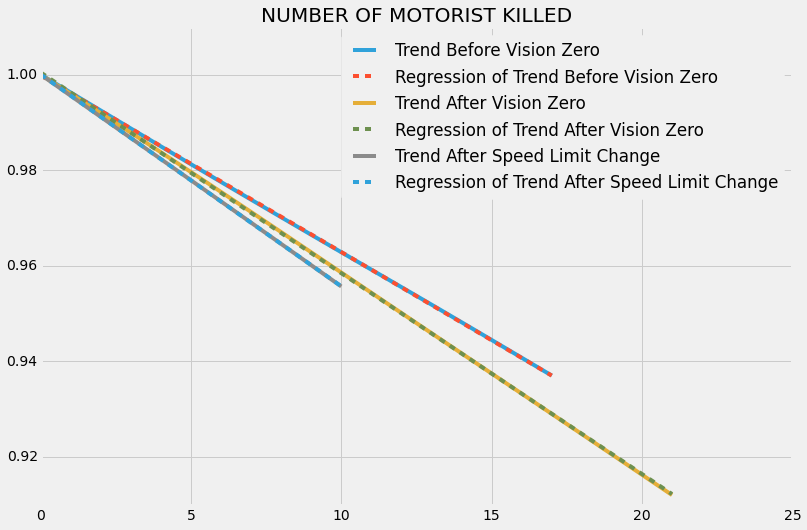

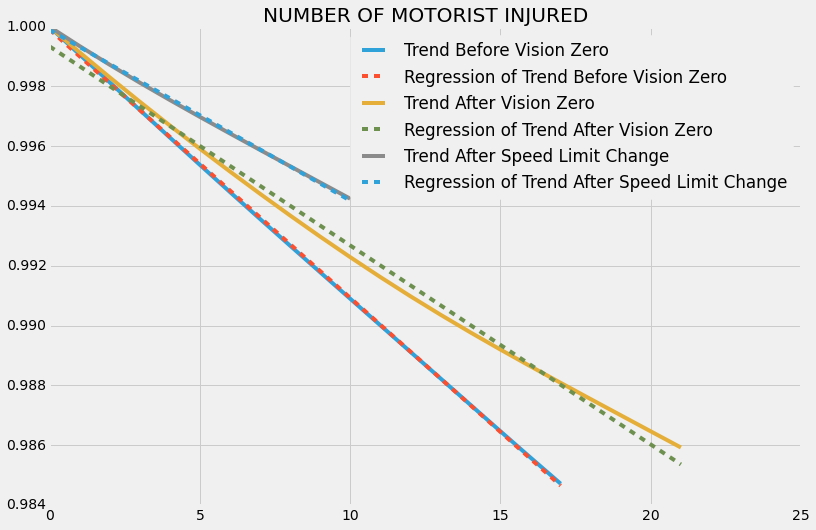

In [176]:
for i in sum_categories:
    doStuff(sums[i], i)

                  0         1
Intercept  1.000103  1.000588
x         -0.002939 -0.002890
                  0         1
Intercept  1.000782  1.001804
x         -0.003893 -0.003810
                  0         1
Intercept  1.000032  1.000173
x         -0.004180 -0.004156
                  0         1
Intercept  1.000110  1.000595
x         -0.001596 -0.001547
                  0         1
Intercept  1.000468  1.001108
x         -0.002210 -0.002158
                  0         1
Intercept  1.000019  1.000127
x         -0.002341 -0.002323
                  0         1
Intercept  0.999620  1.000352
x          0.021926  0.021999
                  0         1
Intercept  1.002562  1.005613
x          0.013483  0.013732
                  0         1
Intercept  1.000052  1.000232
x          0.011411  0.011442
                  0         1
Intercept  1.000004  1.000333
x         -0.004028 -0.003995
                  0         1
Intercept  1.000664  1.001405
x         -0.004999 -0.004939
          

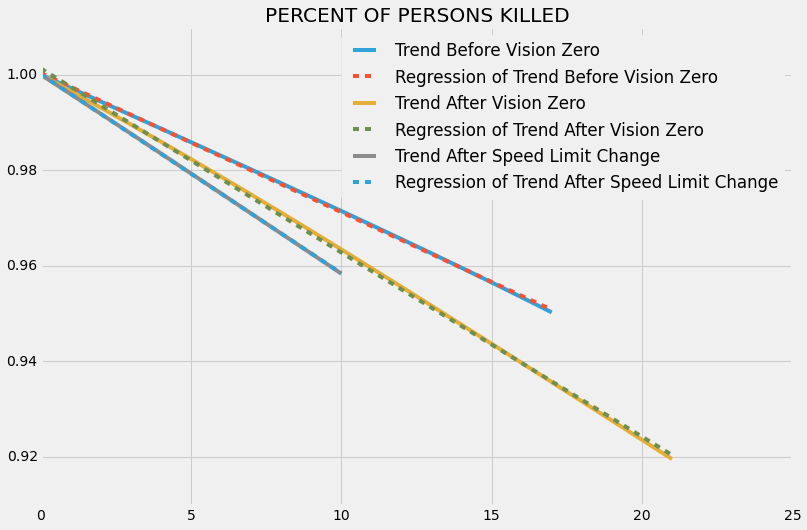

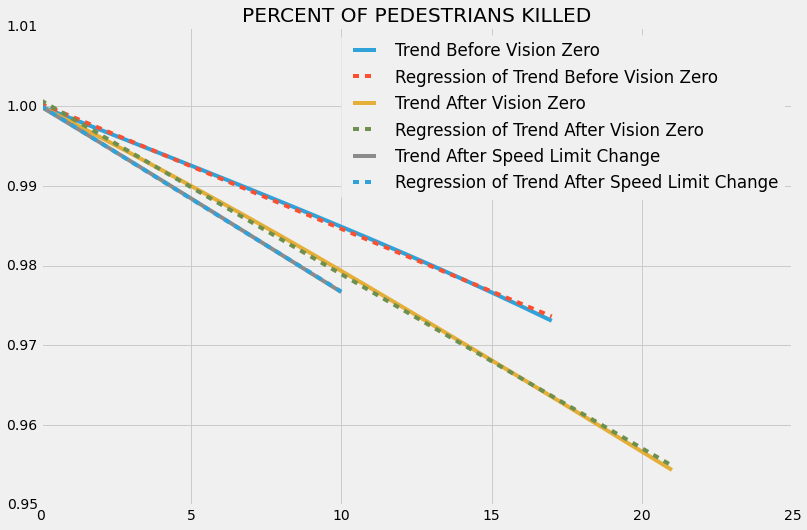

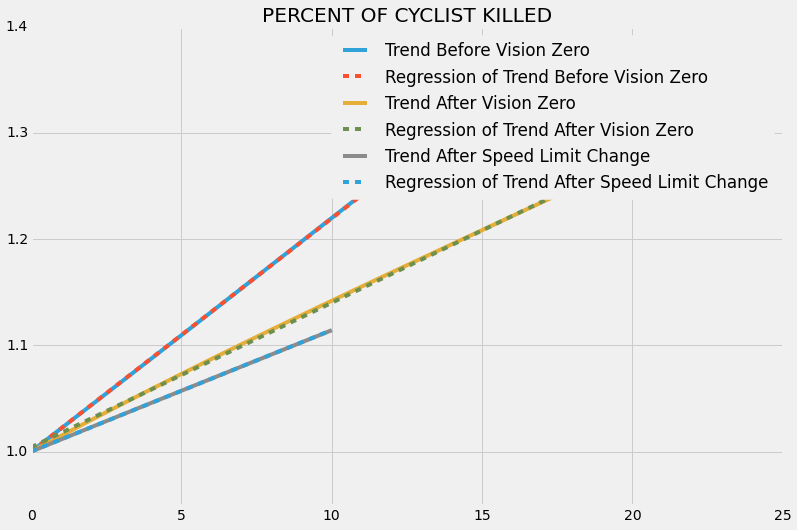

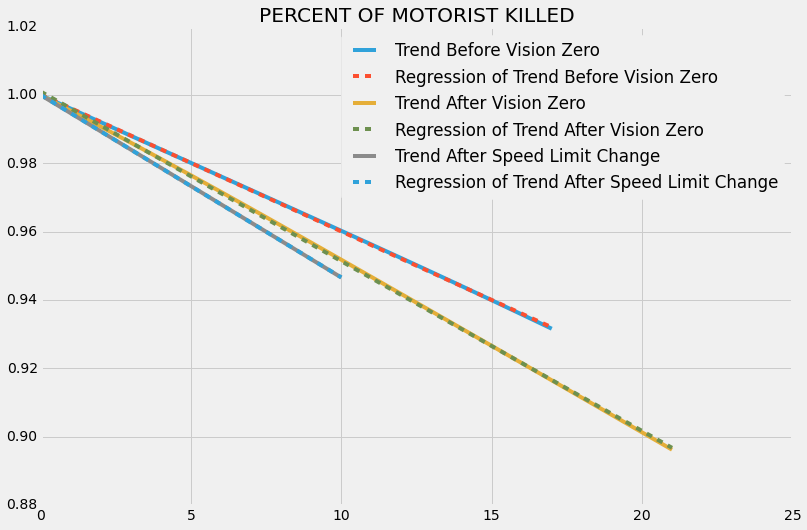

In [177]:
for i in percent_categories:
    doStuff(percents[i], i)

                  0         1
Intercept  0.999878  0.999969
x          0.003007  0.003016
                  0         1
Intercept  0.999425  0.999778
x          0.003012  0.003041
                  0         1
Intercept  0.999904  0.999983
x          0.002980  0.002993


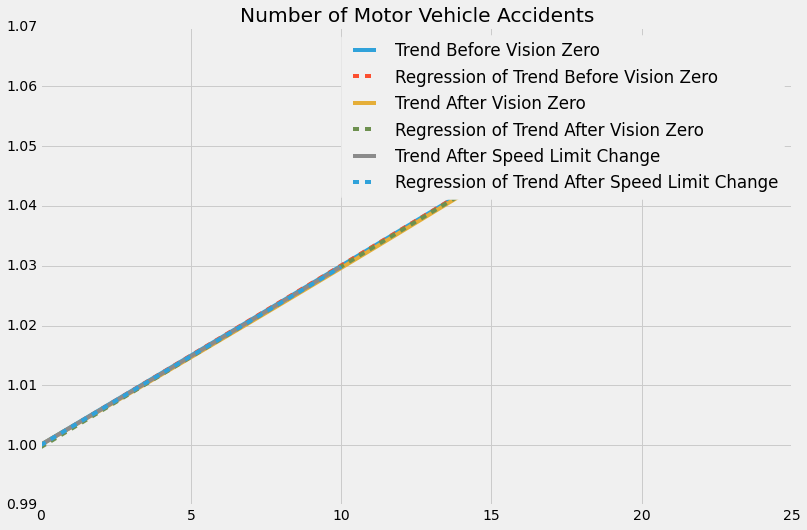

In [178]:
doStuff(count, 'Number of Motor Vehicle Accidents')

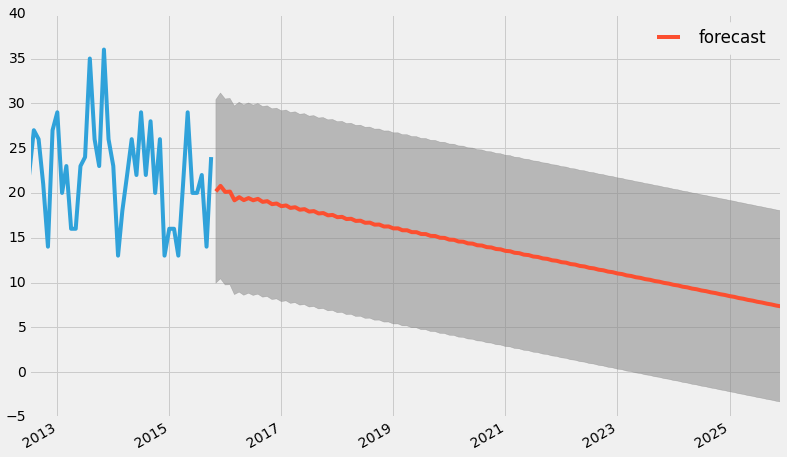

In [194]:
#dates = sorted(grouped.groups.keys())[:-1]
y = sums['NUMBER OF PERSONS KILLED']
mod = statsmodels.tsa.arima_model.ARIMA(np.array(y).astype(float), (6,1,2), dates = date).fit()

figure, ax = pl.subplots(figsize=(12,8))

ax.plot(date, y)
#mod.plot_predict('2015-09-30T20:00:00.000000000-0400', '2025', dynamic=True, ax=ax, plot_insample=False)
mod.plot_predict('2015-11-01', '2025', dynamic=True, ax=ax, plot_insample=False)

ax.set_title('')

In [175]:
sums

{'NUMBER OF CYCLIST INJURED': [450.0,
  507.0,
  433.0,
  332.0,
  276.0,
  212.0,
  192.0,
  131.0,
  195.0,
  290.0,
  400.0,
  508.0,
  470.0,
  524.0,
  479.0,
  429.0,
  281.0,
  175.0,
  120.0,
  94.0,
  190.0,
  309.0,
  388.0,
  473.0,
  538.0,
  501.0,
  488.0,
  430.0,
  280.0,
  186.0,
  115.0,
  82.0,
  161.0,
  304.0,
  474.0,
  441.0,
  574.0,
  568.0,
  517.0,
  408.0],
 'NUMBER OF CYCLIST KILLED': [3.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  2.0,
  3.0,
  0.0,
  1.0,
  0.0,
  2.0,
  2.0,
  0.0,
  1.0,
  1.0,
  0.0,
  2.0,
  2.0,
  3.0,
  3.0,
  4.0,
  1.0,
  1.0,
  2.0,
  0.0,
  1.0,
  0.0,
  0.0,
  2.0,
  1.0,
  1.0,
  3.0,
  3.0,
  2.0,
  2.0],
 'NUMBER OF MOTORIST INJURED': [3550.0,
  3393.0,
  3362.0,
  3261.0,
  2681.0,
  3081.0,
  2738.0,
  2446.0,
  3004.0,
  3246.0,
  3643.0,
  3630.0,
  3758.0,
  3468.0,
  3514.0,
  3347.0,
  3317.0,
  2943.0,
  2720.0,
  2191.0,
  2704.0,
  2875.0,
  3376.0,
  3562.0,
  3287.0,
  3247.0,
  3219.0,
  3